In [27]:
from collections import Counter
import operator
from os.path import basename, join, exists
from pathlib import Path
from os import system, makedirs
from glob import glob
from tqdm import tqdm_notebook
from more_itertools import flatten

import sys
import re

import pandas as pd
import networkx as nx

from aspects.analysis.aspects_hierarchy import get_aspects_hierarchy
from aspects.analysis import rst_data_extractors

from aspects.utilities.transformations import load_serialized
from aspects.utilities.data_paths import ExperimentPaths
from aspects.data_io import serializer

%matplotlib inline

# Load dataset specific files

In [4]:
# here choose dataset's results main directory
# data_path = '/datasets/sentiment/aspects/results/reviews_Cell_Phones_and_Accessories/'
data_path = '../results/reviews_Cell_Phones_and_Accessories-50000-docs/'

experiment_paths = ExperimentPaths(input_path='', output_path=data_path, experiment_name='our')

In [7]:
aspect_to_aspect_graph = serializer.load(experiment_paths.aspect_to_aspect_graph)

In [8]:
aspect_to_aspect_graph

# Aspect to Aspect Graph Analysis

## Degree

In [30]:
degree_df = pd.DataFrame(list(aspect_to_aspect_graph.degree()), columns=['aspect', 'degree'])

In [35]:
degree_df

,aspect,degree
0,case,593
1,pieces,7
2,price,2681
3,use,1115
4,nook,7
5,quality,1025
6,shipping,447
7,battery,1226
8,vaio,2
9,usb charger,4


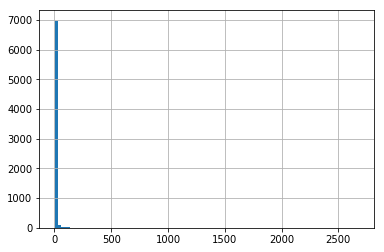

In [31]:
degree_df.degree.hist(bins=100)

In [36]:
degree_df[degree_df.degree > 5]

,aspect,degree
0,case,593
1,pieces,7
2,price,2681
3,use,1115
4,nook,7
5,quality,1025
6,shipping,447
7,battery,1226
10,tablet,7
12,ac,96


In [ ]:
degree_df[degree_df.degree]

## Aspect's page ranks

In [9]:
aspects_page_ranks = serializer.load(experiment_paths.aspects_weighted_page_ranks)

FileNotFoundError: [Errno 2] No such file or directory: '../results/reviews_Cell_Phones_and_Accessories-50000-docs/our/aspects_weighted_page_ranks.pkl'

In [21]:
aspects_page_ranks_df = pd.DataFrame(
    [(aspect, page_rank) for aspect, page_rank in aspects_page_ranks.items()],
    columns=['aspect', 'pagerank']
)

In [22]:
aspects_page_ranks_df.head(10)

,aspect,pagerank
0,phone,0.050792
1,product,0.034677
2,headset,0.021423
3,case,0.020639
4,price,0.011911
5,battery,0.011545
6,item,0.010770
7,charger,0.010195
8,motorola,0.005958
9,what,0.005383


In [23]:
aspects_page_ranks_df['count'] = aspects_page_ranks_df.aspect.apply(lambda a: aspects_counter[a])

In [24]:
aspects_page_ranks_df.head(10)

,aspect,pagerank,count
0,phone,0.050792,92275
1,product,0.034677,22422
2,headset,0.021423,26873
3,case,0.020639,23596
4,price,0.011911,13375
5,battery,0.011545,19786
6,item,0.010770,7876
7,charger,0.010195,12405
8,motorola,0.005958,8031
9,what,0.005383,14095


In [25]:
aspects_graph = load_serialized(data_path_aspects_graph)

In [26]:
aspects_graph.to_directed()

### Edges analysis

Direction of the edge means relation from satellite to nucelus. S -> N

In [12]:
edges_counter = Counter(aspect_to_aspect_graph.edges())

In [13]:
edges_counter.most_common(10)

[(('features', 'phone'), 70),
 (('amazon', 'price'), 64),
 (('motorola', 'price'), 63),
 (('battery', 'price'), 62),
 (('price', 'amazon'), 61),
 (('quality', 'price'), 52),
 (('price', 'motorola'), 47),
 (('charger', 'price'), 47),
 (('price', 'battery'), 46),
 (('sound quality', 'price'), 46)]

In [17]:
aspect = u'volume'
sorted({
    (aspects, cooccurence)
    for aspects, cooccurence
    in edges_counter.items()
    if aspect in aspects
}, key=operator.itemgetter(1), reverse=True)[:10]    

[(('volume', 'price'), 24),
 (('volume', 'motorola'), 15),
 (('volume', 'sound quality'), 14),
 (('volume', 'battery life'), 11),
 (('volume', 'sound'), 10),
 (('sound quality', 'volume'), 10),
 (('use', 'volume'), 10),
 (('motorola', 'volume'), 9),
 (('sound', 'volume'), 9),
 (('volume', 'works'), 8)]

In [18]:
aspect_hierarchy_elements = []
for (aspect_1, aspect_2), n_count in edges_counter.most_common(250):
    aspect_hierarchy_elements.append(get_aspects_hierarchy(edges_counter, aspects_page_ranks, aspect_1, aspect_2))

aspect_hierarchy_elements = set(aspect_hierarchy_elements)

NameError: name 'aspects_page_ranks' is not defined

In [64]:
get_aspects_hierarchy(edges_counter, aspects_page_ranks, 'phone', 'camera')

AspectHierarchyRST(nucleus='phone', satellite='camera', all_relations=176)

In [65]:
import operator

In [66]:
sorted(aspect_hierarchy_elements, key=operator.itemgetter(2), reverse=True)

[AspectHierarchyRST(nucleus=u'phone', satellite=u'case', all_relations=633),
 AspectHierarchyRST(nucleus=u'phone', satellite=u'battery', all_relations=448),
 AspectHierarchyRST(nucleus=u'phone', satellite=u'product', all_relations=446),
 AspectHierarchyRST(nucleus=u'phone', satellite=u'headset', all_relations=322),
 AspectHierarchyRST(nucleus=u'phone', satellite=u'problem', all_relations=280),
 AspectHierarchyRST(nucleus=u'phone', satellite=u'charger', all_relations=270),
 AspectHierarchyRST(nucleus=u'phone', satellite=u'price', all_relations=266),
 AspectHierarchyRST(nucleus=u'headset', satellite=u'ear', all_relations=251),
 AspectHierarchyRST(nucleus=u'phone', satellite=u'feature', all_relations=213),
 AspectHierarchyRST(nucleus=u'product', satellite=u'headset', all_relations=206),
 AspectHierarchyRST(nucleus=u'product', satellite=u'price', all_relations=204),
 AspectHierarchyRST(nucleus=u'phone', satellite=u'thing', all_relations=192),
 AspectHierarchyRST(nucleus=u'battery', satelli

In [31]:
aspects_graph.out_degree()['phone']

9555

In [32]:
aspects_graph.in_degree()['phone']

13198

In [33]:
aspects_graph.out_degree()['product']

2679

In [34]:
aspects_graph.in_degree()['product']

7696

In [35]:
aspects_graph.out_degree()['battery']

2154

In [36]:
aspects_graph.in_degree()['battery']

2499

In [37]:
aspects_in_degree = aspects_graph.in_degree()
aspects_out_degree = aspects_graph.out_degree()

In [38]:
aspects_page_ranks_df['in_degree'] = aspects_page_ranks_df.aspect.apply(lambda a: aspects_in_degree[a])
aspects_page_ranks_df['out_degree'] = aspects_page_ranks_df.aspect.apply(lambda a: aspects_out_degree[a])

In [39]:
aspects_page_ranks_df.head(10)

,aspect,pagerank,count,in_degree,out_degree
0,phone,0.050792,92275,13198,9555
1,product,0.034677,22422,7696,2679
2,headset,0.021423,26873,5904,2351
3,case,0.020639,23596,5216,2375
4,price,0.011911,13375,2750,2178
5,battery,0.011545,19786,2499,2154
6,item,0.010770,7876,2275,947
7,charger,0.010195,12405,2363,1474
8,motorola,0.005958,8031,1577,788
9,what,0.005383,14095,1136,1705


In [40]:
len([g for g in nx.strongly_connected_components(aspects_graph.to_directed())])

14304

In [41]:
# G = max(nx.weakly_connected_component_subgraphs(aspects_graph), key=len)